In [129]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [130]:
df = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Dune1/dune1-chart_data-volume-days-pageTypes.csv")

In [131]:
df

,days,10/22/2021,10/23/2021,10/24/2021,10/29/2021,10/30/2021,10/31/2021,11/01/21,11/02/21,11/03/21,...,03/29/2022,03/30/2022,03/31/2022,04/01/22,04/02/22,04/03/22,04/04/22,04/05/22,04/06/22,04/07/22
0,Online News,342,101,219,116,70,75,126,135,144,...,318,106,96,174,38,32,49,69,47,59
1,QQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YouTube,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Broadcast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Facebook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Legacy Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tumblr,236,526,1012,249,246,181,187,184,148,...,50,51,45,15,31,31,42,24,21,30
7,Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,LinkedIn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blogs,53,57,77,27,26,18,31,17,17,...,7,1,5,6,4,2,2,4,5,4


In [132]:
engagement = df.copy()

In [133]:
#Transpose Matrix
engagement = engagement.transpose()

In [170]:
#Creating df for Regression Analysis
reg_engagement = df.transpose().copy()

In [135]:
#Calculate Sum of engagements from each source
row_sums = engagement.sum(axis=1)

# Add row sums as a new column
engagement['total'] = row_sums
#engagement['total'] = engagement.iloc[:,6] #Only Forums

#Drop first Row containing all sources
engagement = engagement.drop(engagement.index[0])

#Drop all columns except the 'total' column
columns_to_keep = [engagement.columns[-1]]
engagement = engagement[columns_to_keep]

engagement.index.name = 'date'
engagement.index = pd.to_datetime(engagement.index)

In [136]:
engagement

,total
date,
2021-10-22,4420
2021-10-23,4566
2021-10-24,5246
2021-10-29,1452
2021-10-30,1407
...,...
2022-04-03,133
2022-04-04,163
2022-04-05,229


In [137]:
bo = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Dune1/dune1-bo.csv")

In [138]:
bo = bo.dropna(axis=1)

In [139]:
bo

,date,revenue,to_date
0,10/22/2021,"$17,500,000","$17,500,000"
1,10/23/2021,"$13,700,000","$31,200,000"
2,10/24/2021,"$8,900,000","$41,011,174"
3,10/29/2021,"$4,941,106","$58,812,338"
4,10/30/2021,"$6,513,629","$65,325,967"
...,...,...,...
159,04/03/2022,"$2,291","$108,322,948"
160,04/04/2022,"$1,187","$108,324,135"
161,04/05/2022,"$1,322","$108,325,457"
162,04/06/2022,$825,"$108,326,282"


In [140]:
#Fixing 'date' column
#bo['date'] = pd.to_datetime(bo['date'] + '-2021', format='%b-%d-%Y')

#bo['date'] = bo['date'].dt.strftime('%m/%d/%Y')

# Making 'date' the index of the DataFrame
bo.set_index('date', inplace=True)

#Remove $ value
bo['revenue'] = bo['revenue'].str.replace('$', '')
bo['revenue'] = bo['revenue'].str.replace(',', '')

In [141]:
bo

,revenue,to_date
date,,
10/22/2021,17500000,"$17,500,000"
10/23/2021,13700000,"$31,200,000"
10/24/2021,8900000,"$41,011,174"
10/29/2021,4941106,"$58,812,338"
10/30/2021,6513629,"$65,325,967"
...,...,...
04/03/2022,2291,"$108,322,948"
04/04/2022,1187,"$108,324,135"
04/05/2022,1322,"$108,325,457"


In [142]:
engagement['total'] = pd.to_numeric(engagement['total'], errors='coerce')
bo['revenue'] = pd.to_numeric(bo['revenue'], errors='coerce')

In [143]:
engagement_ts = engagement.copy()
bo_ts = bo.copy()

In [144]:
engagement_ts

,total
date,
2021-10-22,4420
2021-10-23,4566
2021-10-24,5246
2021-10-29,1452
2021-10-30,1407
...,...
2022-04-03,133
2022-04-04,163
2022-04-05,229


In [145]:
# Combine your datasets into a single DataFrame 
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

In [146]:
combined_df

,total,revenue
date,,
2021-10-22,4420,17500000
2021-10-23,4566,13700000
2021-10-24,5246,8900000
2021-10-29,1452,4941106
2021-10-30,1407,6513629
...,...,...
2022-04-03,133,2291
2022-04-04,163,1187
2022-04-05,229,1322


In [147]:
#Making Data Stationary

#Differencing
#engagement_ts['total'] = engagement_ts['total'].diff()
#bo_ts['revenue'] = bo_ts['revenue'].diff()


#Taking Logarithm
#engagement_ts['total'] = np.log(engagement_ts['total'])
#bo_ts['revenue'] = bo_ts['revenue'].replace(-np.inf, np.nan)

# Dropping NA values after making it stationary
#engagement_ts.dropna(inplace=True)
#bo_ts.dropna(inplace=True)

In [148]:
#Checking Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Example usage
check_stationarity(engagement_ts['total'])
check_stationarity(bo_ts['revenue'])

ADF Statistic: -6.979522
p-value: 0.000000
Critical Values:
	1%: -3.471
	5%: -2.879
	10%: -2.576
ADF Statistic: -9.449684
p-value: 0.000000
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577


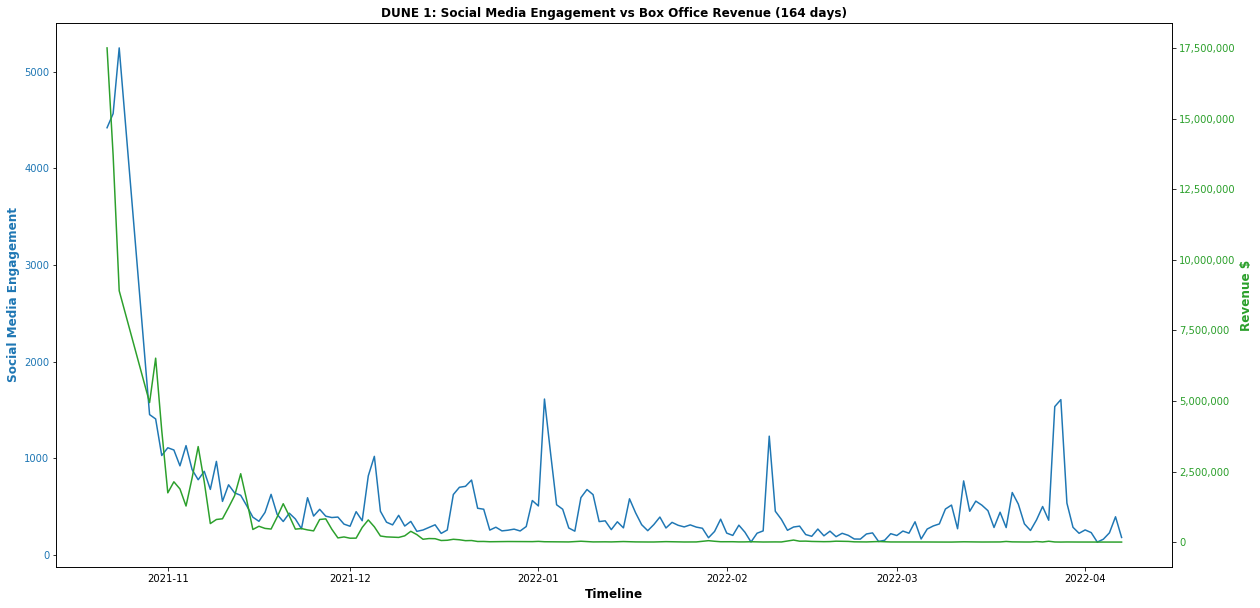

In [149]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Timeline',fontsize=12,fontweight='bold')
ax1.set_ylabel('Social Media Engagement',color=color,fontsize=12,fontweight='bold')
ax1.plot(combined_df.index,combined_df['total'],color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Revenue $',color=color,fontsize=12,fontweight='bold')
ax2.plot(combined_df.index, combined_df['revenue'],color=color)
ax2.tick_params(axis='y',labelcolor=color)

y_labels = ['{:,.0f}'.format(y) for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_labels)
plt.title('DUNE 1: Social Media Engagement vs Box Office Revenue (164 days)',fontsize=12,fontweight='bold')

plt.grid(False)
plt.show()

In [150]:
correlation, _ = pearsonr(combined_df['total'], combined_df['revenue'])

In [151]:
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.8636602622706793


Maximum Pearson correlation coefficient: 0.8636602622706788
Lag associated with Maximum Pearson correlation coefficient: 0


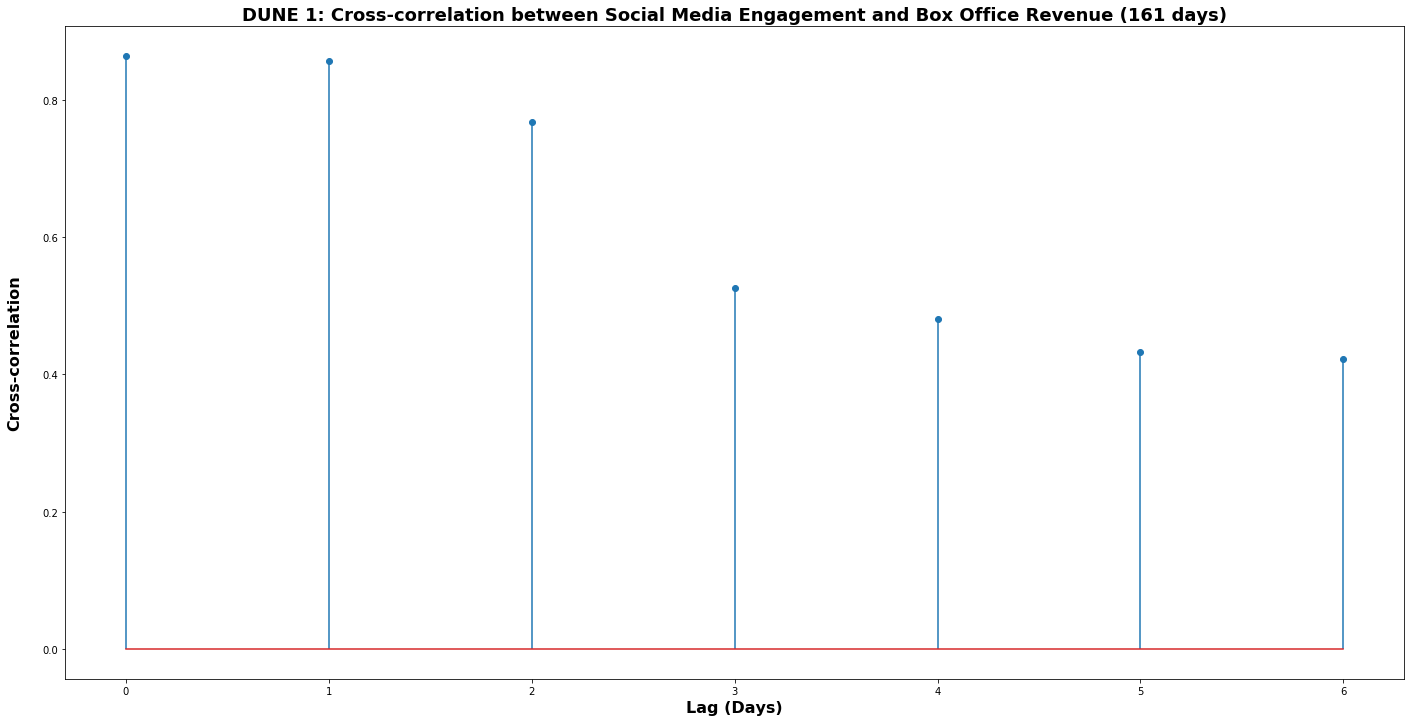

In [152]:
#series1 -> social media engagement
#series2 -> revenue
def cross_correlation(series1, series2, lag=0):
    return series1.corr(series2.shift(lag))

# Example usage:
lags = range(0, 7)  # Example lag values from 0 to 7 days
cross_corr_values = {}
for lag in lags:
    cross_corr_values[lag] = cross_correlation
    (combined_df['total'], combined_df['revenue'], lag)


max_pair = max(cross_corr_values.items(), key=lambda x: x[1])

#print(cross_corr_values.values())
#cross_corr_values = [cross_correlation(combined_df['total'], combined_df['revenue'], lag) for lag in lags]

print(f'Maximum Pearson correlation coefficient: {max_pair[1]}')
print(f'Lag associated with Maximum Pearson correlation coefficient: {max_pair[0]}')
# Plotting the cross-correlation values
import matplotlib
#matplotlib.use('TkAgg')  # Use TkAgg backend
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.stem(lags, cross_corr_values.values(), use_line_collection=True)
plt.xlabel('Lag (Days)',fontsize=16,fontweight='bold')
plt.ylabel('Cross-correlation',fontsize=16,fontweight='bold',labelpad=20)
plt.title('DUNE 1: Cross-correlation between Social Media Engagement and Box Office Revenue (161 days)',fontsize=18,fontweight='bold')
plt.show()

In [153]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Combine datasets into a single DataFrame for the Granger causality test
combined_df = pd.concat(
    [engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

# Perform the Granger causality test
granger_test_results = grangercausalitytests(
    combined_df, maxlag=15, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=62.8480 , p=0.0000  , df_denom=160, df_num=1
ssr based chi2 test:   chi2=64.0264 , p=0.0000  , df=1
likelihood ratio test: chi2=54.0045 , p=0.0000  , df=1
parameter F test:         F=62.8480 , p=0.0000  , df_denom=160, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=17.0491 , p=0.0000  , df_denom=157, df_num=2
ssr based chi2 test:   chi2=35.1841 , p=0.0000  , df=2
likelihood ratio test: chi2=31.8397 , p=0.0000  , df=2
parameter F test:         F=17.0491 , p=0.0000  , df_denom=157, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8017  , p=0.4947  , df_denom=154, df_num=3
ssr based chi2 test:   chi2=2.5146  , p=0.4727  , df=3
likelihood ratio test: chi2=2.4951  , p=0.4762  , df=3
parameter F test:         F=0.8017  , p=0.4947  , df_denom=154, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8528  , p=0.1217  

In [154]:
#Linear Regression Fit
reg_engagement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
days,Online News,QQ,YouTube,Broadcast,Facebook,Legacy Instagram,Tumblr,Instagram,LinkedIn,Blogs,Forums,Facebook Public,X,VK,Review,Reddit,4Chan
10/22/2021,342,0,0,0,0,0,236,0,0,53,539,0,3230,0,20,0,0
10/23/2021,101,0,0,0,0,0,526,0,0,57,754,0,3110,0,18,0,0
10/24/2021,219,0,0,0,0,0,1012,0,0,77,681,0,3245,0,12,0,0
10/29/2021,116,0,0,0,0,0,249,0,0,27,330,0,726,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/03/22,32,0,0,0,0,0,31,0,0,2,41,0,27,0,0,0,0
04/04/22,49,0,0,0,0,0,42,0,0,2,31,0,37,0,2,0,0
04/05/22,69,0,0,0,0,0,24,0,0,4,28,0,100,0,4,0,0
04/06/22,47,0,0,0,0,0,21,0,0,5,60,0,248,0,14,0,0


In [172]:
#Make first row as Columns
reg_engagement.columns = reg_engagement.iloc[0]

In [173]:
#Drop first row
reg_engagement = reg_engagement.drop(reg_engagement.index[0])

In [174]:
#Drop Columns (Content Sources where all values are 0)
reg_engagement = reg_engagement.loc[:, (reg_engagement != 0).any(axis=0)]

In [175]:
reg_engagement = reg_engagement.rename(columns={'days': 'date'})

In [176]:
reg_engagement

days,Online News,Tumblr,Blogs,Forums,X,Review
10/22/2021,342,236,53,539,3230,20
10/23/2021,101,526,57,754,3110,18
10/24/2021,219,1012,77,681,3245,12
10/29/2021,116,249,27,330,726,4
10/30/2021,70,246,26,242,821,2
...,...,...,...,...,...,...
04/03/22,32,31,2,41,27,0
04/04/22,49,42,2,31,37,2
04/05/22,69,24,4,28,100,4
04/06/22,47,21,5,60,248,14


In [160]:
shift = 0 #Based on Lag

In [167]:
bo_series = bo['revenue']

In [162]:
bo_series_shifted = bo_series.shift(shift)

In [163]:
bo_series_shifted = bo_series_shifted[:shift]

In [164]:
bo_series_shifted

Series([], Name: revenue, dtype: int64)

In [165]:
reg_engagement = reg_engagement.iloc[:shift, :]

In [171]:
reg_engagement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
days,Online News,QQ,YouTube,Broadcast,Facebook,Legacy Instagram,Tumblr,Instagram,LinkedIn,Blogs,Forums,Facebook Public,X,VK,Review,Reddit,4Chan
10/22/2021,342,0,0,0,0,0,236,0,0,53,539,0,3230,0,20,0,0
10/23/2021,101,0,0,0,0,0,526,0,0,57,754,0,3110,0,18,0,0
10/24/2021,219,0,0,0,0,0,1012,0,0,77,681,0,3245,0,12,0,0
10/29/2021,116,0,0,0,0,0,249,0,0,27,330,0,726,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04/03/22,32,0,0,0,0,0,31,0,0,2,41,0,27,0,0,0,0
04/04/22,49,0,0,0,0,0,42,0,0,2,31,0,37,0,2,0,0
04/05/22,69,0,0,0,0,0,24,0,0,4,28,0,100,0,4,0,0
04/06/22,47,0,0,0,0,0,21,0,0,5,60,0,248,0,14,0,0


In [124]:
reg_engagement = reg_engagement.astype(int)

In [169]:
reg_engagement

days,Online News,Tumblr,Blogs,Forums,X,Review


In [177]:
bo_series

date
10/22/2021    17500000
10/23/2021    13700000
10/24/2021     8900000
10/29/2021     4941106
10/30/2021     6513629
                ...   
04/03/2022        2291
04/04/2022        1187
04/05/2022        1322
04/06/2022         825
04/07/2022        1548
Name: revenue, Length: 164, dtype: int64

In [178]:
# Prepare the features (X) and the target (y)
X = reg_engagement  # 'Reg Engagement' df as features
y = bo_series  # 'Revenue' series

# Reset index if necessary
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the model (for the intercept)
X_scaled_with_const = sm.add_constant(X_scaled)

# Fit the OLS model
model = sm.OLS(y, X_scaled_with_const).fit()

# Get the regression report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     222.9
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.96e-74
Time:                        13:36:15   Log-Likelihood:                -2427.6
No. Observations:                 164   AIC:                             4869.
Df Residuals:                     157   BIC:                             4891.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.766e+05   5.18e+04     11.129      

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [179]:
# Extract the coefficients (excluding the intercept) and sort them by their absolute values
coefficients = model.params.drop('const').abs().sort_values(ascending=False)

# Print the sorted coefficients to identify the top contributing features
print("\nTop Contributing Features:")
print(coefficients)


Top Contributing Features:
X              1.789114e+06
Forums         5.857200e+05
Blogs          5.276553e+05
Tumblr         6.739212e+04
Online News    5.837038e+04
Review         4.908968e+04
dtype: float64
